## Time to get your hands dirty. Your first neural network; pick your favourite.


For the last coding assignment, you'll need to implement a neural network. We'll look at a relatively simple binary classification problem. Here below are three options; completing one of them for the exam is enough

### Tasks:

1. Remember: scale your data appropriately

2. Decide on a testing strategy (a simple test/train split? a CV strategy? set a test set aside to be looked at at the very end?)

2. Decide your optimization metric.

3. Write down your network architecture. You can start from a fully connected, multi-layer perceptron (and then explore)

4. Use one the package among those we've seen. These include Tensorflow via keras, pytorch, and the MPL classifier implemented in scikit-learn. This is an opportunity to pick the one you're most interested in learning. 

5. Optimize the hyperparameters of your network. Explore different hyperparameters and see what fits the data best.  Do your best now to optimize the network architecture. Be creative!

6. Report on the perfomance of the network on the test set; report other metrics that have not been optimized.


### A few tips:

- In scikit-learn, remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.
- If it takes too long, run the hyperparameter optimization on a subset of the training set. Then retrain the full network using the best hyperparameters only.
- On cross validation, for scikit learn we've seen how to use `GridSearchCV` already. For Tensorflow, there's a really cool tool called [Tensorboard](https://www.tensorflow.org/tensorboard)

### Datasets:

You can choose one of these three problems:

- **1. Galaxies vs quasars (but with neural networks)** Go back to our SDSS data we've used in Lecture 19. We had color differences, and the task was to classifty quasars vs galaxies. Repeat that task with a neural network.

- **2. Can a computer learn if we're going to detect gravitational waves? (but with neural networks)** Go back to the SNR classifier for gravitational wave events, same data we've used in Lecture. We had properties of black hole binaries, and the task was to classify. Repeat that task with a neural network.

- **3. The HiggsML challenge** Branching out of astrophysics, let's mess around with a dataset of simulated but  realistic events from the ATLAS particle detector at CERN.
    - Data are at `solutions/higgs.tar.gz` (you need to uncompress with `tar -czvf`)
    - There are $N_{\rm samples} = 2.5\times 10^5$ entries with $N_{\rm features}=30$ features each. 
    - The taks is that of classifying these features against a set of labels, which are either `s` (source) or `b` (background).
    - For some info on both the physics and the dataset see [this document](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf); includes a description of the features and how data have been padded (-999) for missing values.
    - This dataset was part of a challenge that run on Kaggle in 2014: https://higgsml.ijclab.in2p3.fr/ 



#### (On dataset 2, this is the best I could do...)

Together with Alberto Vecchio and Geraint Prattent, I tackled this gravitational-wave classification problem using neural networks in this paper: [arXiv:2007.06585](https://arxiv.org/abs/2007.06585). 
- In the paper we reached an accuracy (true positive + true negative / total) of $98.4\%$. The data you're using are those of the green curve in Fig 2 of that paper. Could you do better? If yes, please tell me how! 
- I should have really put a figure with my ROC in that paper but I didn't!

In [19]:
import numpy as np
import pylab as plt
import pandas as pd

data = pd.read_csv("../../../dati_higgs.csv")
data

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [20]:
# these are 250000 data, with a lot of them has missing values -999 these has to be cleaned up...
# remove all the column that has too many null values
for column in data.columns:
    count = (data[column] == -999).sum()
    if (count/2500 > 0):
        print(f"{column} , percentage -999 = {count/2500}%")
        if (count/2500 > 80): #80 = leave all the column but has less data, 50 = remove 7 column and gain a lot of data, 10 = remove 3 more column , not more data retrived
            data = data.drop(columns=[column])

DER_mass_MMC , percentage -999 = 15.2456%
DER_deltaeta_jet_jet , percentage -999 = 70.9828%
DER_mass_jet_jet , percentage -999 = 70.9828%
DER_prodeta_jet_jet , percentage -999 = 70.9828%
DER_lep_eta_centrality , percentage -999 = 70.9828%
PRI_jet_leading_pt , percentage -999 = 39.9652%
PRI_jet_leading_eta , percentage -999 = 39.9652%
PRI_jet_leading_phi , percentage -999 = 39.9652%
PRI_jet_subleading_pt , percentage -999 = 70.9828%
PRI_jet_subleading_eta , percentage -999 = 70.9828%
PRI_jet_subleading_phi , percentage -999 = 70.9828%


In [21]:
# Remove all rows that contain -999 in any column
data = data[~(data == -999).any(axis=1)]

# Replace 's' with 1 and 'b' with 0 in the 'Label' column,
data['Label'] = data['Label'].replace({'s': 1, 'b': 0})

# remove also the ID column , it's just a progressiv number... useless
data = data.drop(columns=['EventId'])

data

/tmp/ipykernel_32090/1236526853.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Label'] = data['Label'].replace({'s': 1, 'b': 0})
/tmp/ipykernel_32090/1236526853.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = data['Label'].replace({'s': 1, 'b': 0})


,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,...,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653,1
5,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,...,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414,0
6,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,...,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653,1
11,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,239.804,...,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640,0.307170,0
23,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,440.859,...,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009,0.001503,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249976,137.371,4.640,92.603,107.121,3.189,322.430,-2.384,2.149,2.755,225.261,...,2,85.132,1.991,-1.518,51.068,-1.197,-2.831,136.200,0.001503,1
249980,119.934,20.078,88.751,35.227,0.660,111.491,1.836,2.800,18.532,189.198,...,2,69.219,-1.064,1.118,43.719,-1.725,-2.756,112.938,0.018636,1
249985,126.151,29.023,95.258,152.684,1.000,163.066,-0.240,1.504,24.642,327.502,...,2,158.904,0.401,0.034,34.196,-0.599,-2.525,193.099,0.018636,1
249993,130.075,3.918,66.781,77.369,0.936,322.296,-0.207,3.102,49.937,610.482,...,3,155.864,-0.358,1.093,134.344,0.578,-2.215,546.066,0.001503,1


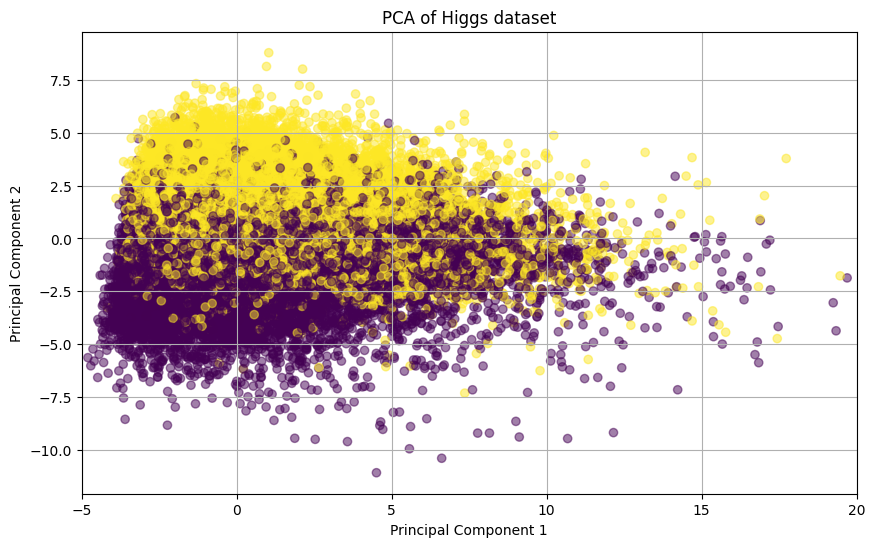

Explained variance by each component: [20.22517156 11.58527629  8.48859471  5.71275718  5.62482414]%


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

y  = np.array(data['Label']) #it's the discrimative
x_scaled = StandardScaler().fit_transform(data.drop(columns=['Label']))

pca = PCA(n_components=5)
X_pca = pca.fit_transform(x_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('PCA of Higgs dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.xlim(-5, 20)
plt.show() 

# percentuage of explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance*100}%")

# I've tried IsoMap, t-SNE and other non linear ... but they struggle a lot

In [23]:
import tensorflow as tf #installed the CPU version instead of the GPU version given by the prof
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers #neded for the L2 regularization

print(tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

2.19.0
GPU available: []


In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Parameters
epochs = 15
batch_size = 64
n_splits = 5  # 5-fold cross validation

# prepare the shape for X, the y is already done before
X = x_scaled.astype('float32')

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
acc_scores = []
y_true_all = []
y_pred_prob_all = []

# facciamo una cross validation per vedere che il modello base sia stabile e non abbia problematiche al variare dei dati forniti, poi faremo un tuning degli hyper parameter
# non posso usare direttamente CV perchè keras non lo supporta, e l'uso di KerasClassifier è troppo complicato ...

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)): #divided in 5 folder

    X_train_fold, X_val_fold = X[train_idx], X[val_idx] #select the folder
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]

    # building the model
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(62, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=regularizers.l2(0.01)), # first layer, there are 31 feature in the complete table
        tf.keras.layers.Dense(31, activation='relu', kernel_regularizer=regularizers.l2(0.01)),                            # second layer
        tf.keras.layers.Dense(1, activation='sigmoid')                                                                     # the sigmoid give a binary output : signal or not
    ])

    # Dense = fully connected neurons, each neuron of a leyer connect with all the other af the next layer
    # Different activation function for each layer
    # I have choose the L2 regularization with a rate of 0.01

    # model compilation
    model.compile(
         optimizer='adam',              # Use the Adam optimizer (adaptive learning rate, usually works very well out of the box)
        loss='binary_crossentropy',     # Binary cross-entropy: best suited for binary classification (output 0 or 1)
        metrics=['accuracy']            # During training and evaluation, show the classification accuracy
    )

    history = model.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )

    y_pred_prob = model.predict(X_val_fold)  # Probabilità, non classi, valore tra 0 e 1
    y_true_all.extend(y_val_fold)      # aggiunge tutti i valori veri di quel fold
    y_pred_prob_all.extend(y_pred_prob)  # aggiunge tutte le probabilità predette

    # Evaluate on validation fold
    _, acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    acc_scores.append(acc)
    print(f"Fold {fold+1}/{n_splits} , Accuracy : {acc}")

model.summary() #visualize the architecture


/mnt/c/Users/ASUS/Desktop/WSL_Shared/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
Fold 1/5 , Accuracy : 0.9977978467941284
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 2/5 , Accuracy : 0.9906041026115417
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 3/5 , Accuracy : 0.9846583008766174
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 4/5 , Accuracy : 0.9994127750396729
426/426 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Fold 5/5 , Accuracy : 0.9936132431030273


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 62)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 31)             │         1,953 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │            32 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,909 (46.52 KB)

 Trainable params: 3,969 (15.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,940 (31.02 KB)

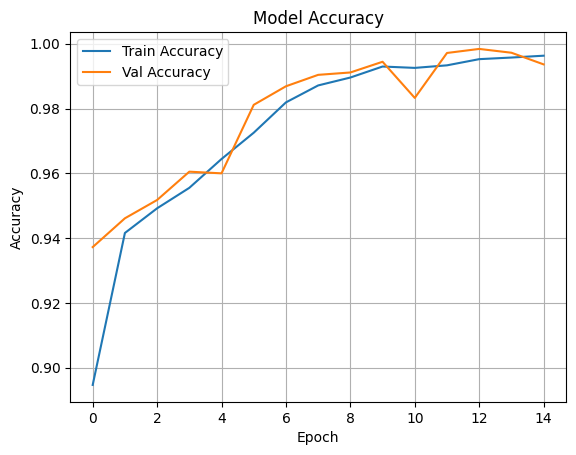

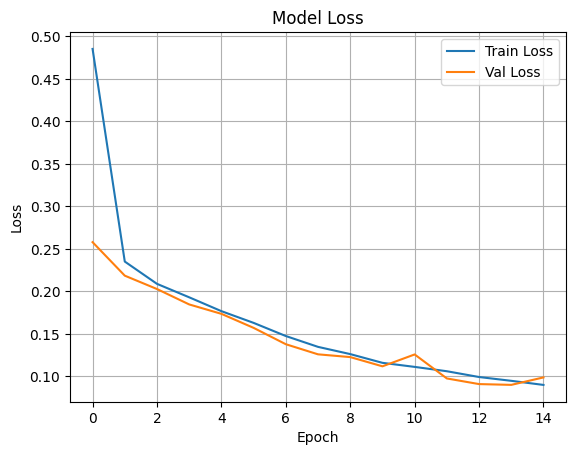

In [25]:
#Let's have a look at the metrics and model values for ONLY the last evaluation, it's just to find the overfitting point

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid()
plt.show()


Both the Loss are going down , we are not overfitting with this parameter i propose, we are learning properly the dataset


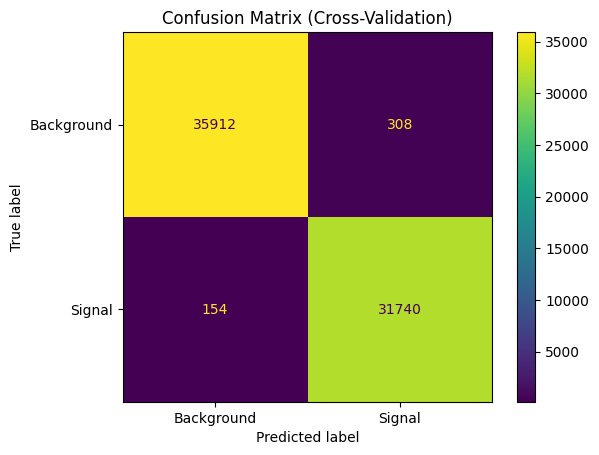


Mean Accuracy across folds: 0.9932
Precision: 0.9903894158761857
Recall: 0.9951715056123409
F1 Score: 0.9927747020737543


In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

# Converti in array
y_true_all = np.array(y_true_all)
y_pred_prob_all = np.array(y_pred_prob_all)

y_pred_class_all = (np.array(y_pred_prob_all) > 0.5).astype(int)

# Confusion matrix cumulativa
cm = confusion_matrix(y_true_all, y_pred_class_all)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Background', 'Signal'])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix (Cross-Validation)')
plt.grid(False)
plt.show()

# Altre metriche

print(f"\nMean Accuracy across folds: {np.mean(acc_scores):.4f}")
precision = precision_score(y_true_all, y_pred_class_all)
recall = recall_score(y_true_all, y_pred_class_all)
f1 = f1_score(y_true_all, y_pred_class_all)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

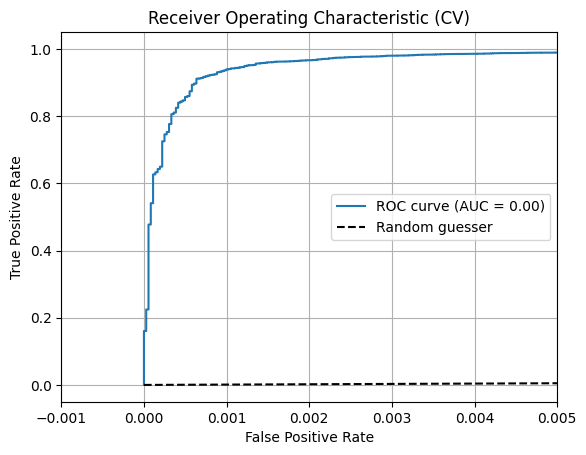

In [27]:
from sklearn.metrics import roc_curve

# Calcolo ROC e AUC
fpr, tpr, _ = roc_curve(y_true_all, y_pred_prob_all)
roc_auc = np.trapezoid(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label = f"Random guesser")  # linea del caso random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (CV)')
plt.grid()
plt.legend()
plt.xlim(-0.001 , 0.005)
plt.show()

In [28]:
import keras_tuner as kt
from tensorflow.keras import layers, regularizers

def model_builder(hp):
    model = tf.keras.Sequential()

    # Tune the number of units in the first Dense layer
    hp_units_1 = hp.Int('units_1', min_value=16, max_value=128, step=16)
    model.add(layers.Dense(units=hp_units_1, activation='relu', input_shape=(X.shape[1],)))

    # Second Dense layer
    hp_units_2 = hp.Int('units_2', min_value=8, max_value=64, step=8)
    model.add(layers.Dense(units=hp_units_2, activation='relu'))

    # L2 regularization
    hp_l2 = hp.Choice('l2_reg', values=[0.01, 0.001, 0.0001])
    model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(hp_l2)))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [29]:
tuner = kt.Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=15,
    factor=3,
    directory='my_dir',
    project_name='higgs_boson_tuning'
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.5, random_state=42) # non mi serve nuovamente CV, ora so che funziona il modello, mi basta un semlice split
 
tuner.search(X_train, y_train,
             epochs=15,
             validation_split=0.1,
             batch_size=64,
             callbacks=[stop_early],
             verbose=1)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best number of units in first layer: {best_hps.get('units_1')}")
print(f"Best number of units in second layer: {best_hps.get('units_2')}")
print(f"Best L2 regularization: {best_hps.get('l2_reg')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")


Reloading Tuner from my_dir/higgs_boson_tuning/tuner0.json
Best number of units in first layer: 80
Best number of units in second layer: 24
Best L2 regularization: 0.0001
Best learning rate: 0.01


In [30]:
# Build the model with best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Retrain the model on the full training set
history = best_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)

Epoch 1/20


/mnt/c/Users/ASUS/Desktop/WSL_Shared/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


479/479 - 3s - 6ms/step - accuracy: 0.9147 - loss: 0.2096 - val_accuracy: 0.9422 - val_loss: 0.1560
Epoch 2/20
479/479 - 1s - 3ms/step - accuracy: 0.9544 - loss: 0.1201 - val_accuracy: 0.9612 - val_loss: 0.1050
Epoch 3/20
479/479 - 1s - 3ms/step - accuracy: 0.9710 - loss: 0.0743 - val_accuracy: 0.9853 - val_loss: 0.0471
Epoch 4/20
479/479 - 1s - 3ms/step - accuracy: 0.9825 - loss: 0.0482 - val_accuracy: 0.9853 - val_loss: 0.0498
Epoch 5/20
479/479 - 1s - 2ms/step - accuracy: 0.9894 - loss: 0.0301 - val_accuracy: 0.9953 - val_loss: 0.0128
Epoch 6/20
479/479 - 1s - 2ms/step - accuracy: 0.9892 - loss: 0.0310 - val_accuracy: 0.9930 - val_loss: 0.0336
Epoch 7/20
479/479 - 1s - 3ms/step - accuracy: 0.9922 - loss: 0.0226 - val_accuracy: 0.9877 - val_loss: 0.0324
Epoch 8/20
479/479 - 1s - 3ms/step - accuracy: 0.9933 - loss: 0.0196 - val_accuracy: 0.9938 - val_loss: 0.0158
Epoch 9/20
479/479 - 1s - 2ms/step - accuracy: 0.9916 - loss: 0.0232 - val_accuracy: 0.9971 - val_loss: 0.0094
Epoch 10/20


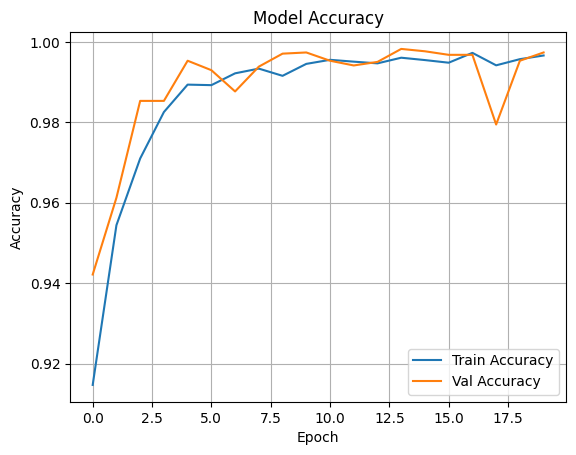

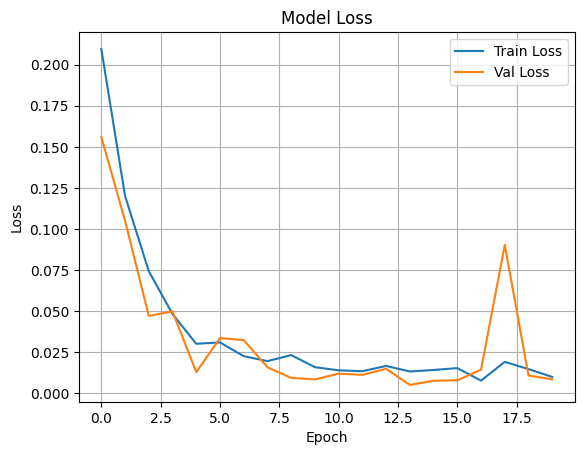

In [31]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid()
plt.show()

1065/1065 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  


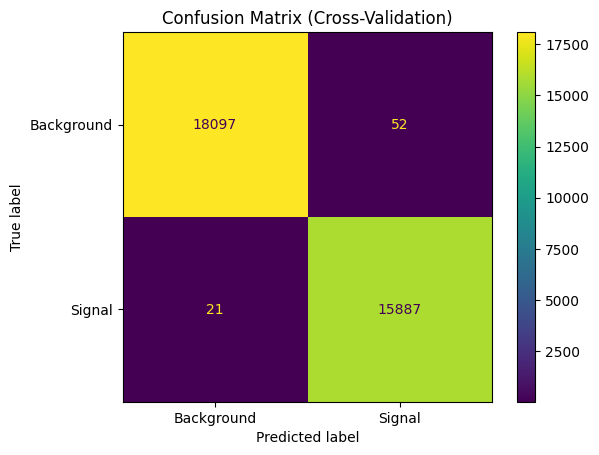

Precision: 0.9967375619549532
Recall: 0.9986799094795071
F1 Score: 0.9977077903727196


In [32]:
y_pred = best_model.predict(X_test)
y_pred_class = y_pred > 0.5

# Confusion matrix cumulativa
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Background', 'Signal'])
disp.plot(cmap='viridis')
plt.title('Confusion Matrix (Cross-Validation)')
plt.grid(False)
plt.show()

# Altre metriche
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

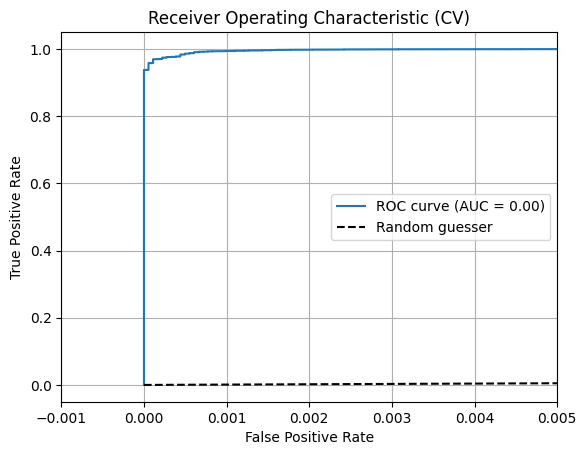

In [33]:
# Calcolo ROC e AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = np.trapezoid(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label = f"Random guesser")  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (CV)')
plt.grid()
plt.legend()
plt.xlim(-0.001 , 0.005)
plt.show()